# Bosques Aleatorios (Random Forest)

En palabras simples, los bosques aleatorios serían un conjunto de árboles de decisión, cada uno de los cuales estará confeccionado de manera diferente, tal vez tomando para los nodos algunas características unos y algunas distintas otros, con diferentes niveles máximos, ramificaciones, etc. 

La forma en que se utilizan estos bosques aleatorios para realizar clasificaciones es evaluar los datos de una observación a clasificar en todos estos árboles, y el resultado de la clasificación que arroja cada uno, que puede ser distinta entre árboles, se toma de la siguiente manera para decidir qué hacer:

* La clasificación que arrojó la mayoría es la que se toma como resultado final
* Se toma, además, un promedio ponderado

Para una explicación más detallada, aquí un texto obtenido de `ChatGPT`:

Los **bosques aleatorios** (*random forests*) son un método de aprendizaje automático supervisado que se utiliza tanto para clasificación como para regresión. Es una extensión del algoritmo de los árboles de decisión, diseñada para mejorar su precisión y robustez al reducir el problema de sobreajuste (*overfitting*). Fue desarrollado por Leo Breiman en 2001.

## ¿Cómo funcionan los bosques aleatorios?

1. **Creación de múltiples árboles de decisión**:
   - Se generan varios árboles de decisión independientes, cada uno entrenado con un subconjunto diferente de los datos de entrenamiento. Esto se hace mediante una técnica llamada **bootstraping** (muestreo con reemplazo).
   - Durante el entrenamiento de cada árbol, solo se considera un subconjunto aleatorio de características para dividir los nodos, lo que introduce diversidad entre los árboles.

2. **Predicción agregada**:
   - En el caso de clasificación: Cada árbol "vota" por una clase, y la clase final es la más votada (mayoría).
   - En el caso de regresión: El resultado es el promedio de las predicciones de todos los árboles.

## Ventajas de los bosques aleatorios

1. **Reducción del sobreajuste**: Gracias a la combinación de múltiples árboles, los bosques aleatorios son menos propensos a sobreajustarse en comparación con un solo árbol de decisión.
2. **Alta precisión**: Su capacidad para manejar datos con muchas características y su robustez ante ruido los hacen muy precisos.
3. **Versatilidad**: Funcionan bien tanto para clasificación como para regresión.
4. **Capacidad para manejar datos faltantes**: Pueden estimar valores faltantes y trabajar con conjuntos de datos incompletos.
5. **Importancia de las características**: Pueden calcular qué características son más importantes para las predicciones, lo cual es útil para entender el modelo.

## Desventajas de los bosques aleatorios

1. **Mayor complejidad**: En comparación con un árbol de decisión, son más lentos y requieren más recursos computacionales.
2. **Interpretabilidad limitada**: Aunque se puede obtener la importancia de las características, entender el modelo completo es más complicado debido al gran número de árboles.

## Aplicaciones

- Detección de fraudes.
- Diagnósticos médicos.
- Análisis de clientes.
- Reconocimiento de imágenes.
- Predicciones meteorológicas, entre otros.

En resumen, los bosques aleatorios son una técnica poderosa y flexible, ideal para problemas donde la precisión y la generalización son clave.


## Ejemplo en Python

![Bosques Aleatorios](./img/bosques_aleatorios1.png)

### Aleatoriedad

In [1]:
import pandas as pd

#### Muestreo con reemplazo (bootstraping)

En este caso, simplemente se generan muestras aleatorias del mismo dataset con el cual contamos, de forma que de cada muestra luego se generará un árbol del bosque y al haber aleatoriedad, permitirá la diversidad de dichos árboles, evitando tener uno solo que esté sobre-ajustado.

In [5]:
personas = pd.read_csv("../datos/ingresos.csv")
print(personas.shape)
personas.head()

(100, 6)


,edad,estudio,genero,tipo_trabajo,horas,ingreso
0,27,9,0,0,40,0
1,30,9,0,0,40,0
2,34,8,0,0,40,0
3,26,13,0,0,50,0
4,23,4,1,0,25,0


In [7]:
# en cada nueva muestra, obtenemos un nuevo conjunto de observaciones
print(personas.sample(frac=2/3, replace=True)) 
print(personas.sample(frac=2/3, replace=True))

    edad  estudio  genero  tipo_trabajo  horas  ingreso
96    20       10       0             0     25        0
42    24        9       1             0     40        0
16    80        9       1             1     30        0
81    34       10       0             1     72        0
6     21       10       0             0     15        0
..   ...      ...     ...           ...    ...      ...
19    31       13       1             0     40        1
80    38       10       0             1     50        0
0     27        9       0             0     40        0
68    58       13       1             0     40        0
69    40        9       0             0     40        0

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
60    26       10       1             0     52        1
40    59       13       1             0     40        1
90    59        9       0             0     35        0
9     41       10       1             0     40        1
2     34        8       0

#### Selección de las Características para Divisiones

Esta otra forma de aleatoriedad para generar los árboles del bosque consiste en obtener muestras diferentes, con todas las filas, pero cada muestra contendrá solo un conjunto de columnas/características/features.

Esto es especialmente útil porque supongamos que generamos árboles aleatorios, siempre con las mismas columnas y supongamos que hay algunas o una de esas columnas que son las más acertadas en cuanto a métricas de información e impureza GINI para utilizar para entrenar nuestro modelo. En cada muestra, de alguna manera, el algoritmo utilizará siempre esa o esas mismas columnas como referencia principal para generarse y eso hará que entre los árboles se pierda la aleatoriedad y diversidad.

Ahora bien, ¿cuántas columnas se utilizan para la muestra? Depende, por lo general se cuenta la cantidad de columnas y la raíz cuadrada de dicha cifra es la que se toma para el número de columnas.

In [8]:
from random import sample

In [20]:
print(personas.columns[:-1].tolist(), "\n")
print(sample(personas.columns[:-1].tolist(), 3))
print(sample(personas.columns[:-1].tolist(), 3))

['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'] 

['genero', 'horas', 'estudio']
['tipo_trabajo', 'estudio', 'edad']


#### Creación del Bosque Aleatorio (Random Forest)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
bosque = RandomForestClassifier(n_estimators=100, # cant de arboles
                               criterion="gini", # puede ser gini o entropy
                               max_features="sqrt", # cant maxima de columnas por muestra: la raiz cuadrada del total
                               bootstrap=True, # utilizar, ademas, muestreo con reemplazo
                               max_samples=2/3, # porcentaje del total de datos para cada muestra para cada arbol
                               oob_score=True) # metrica para evaluar cada arbol con los datos con los que no se lo haya entrenado

bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values)

RandomForestClassifier(max_samples=0.6666666666666666, oob_score=True)

In [27]:
print(bosque.predict([[50, 16, 1, 1, 40]]))
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values))
print(bosque.oob_score_)

[1]
0.97
0.77


#### Visualización del Bosque

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree

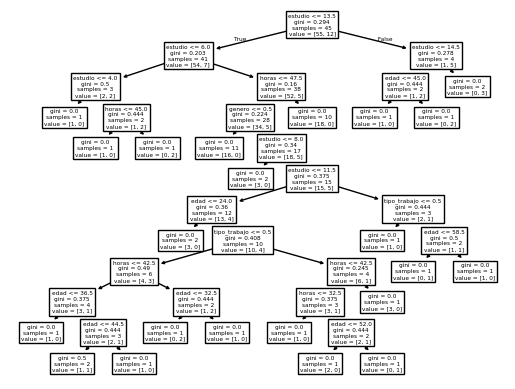

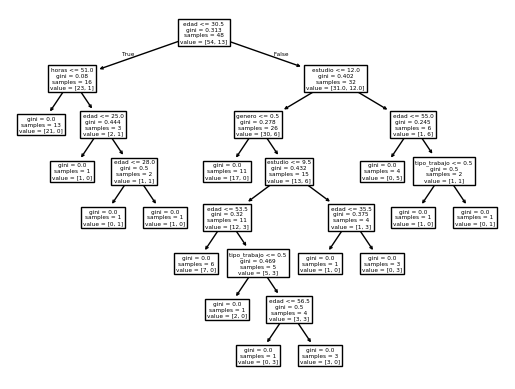

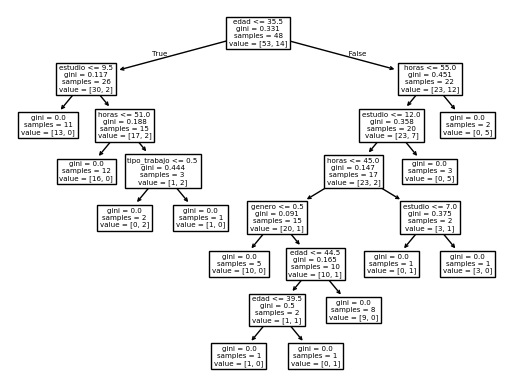

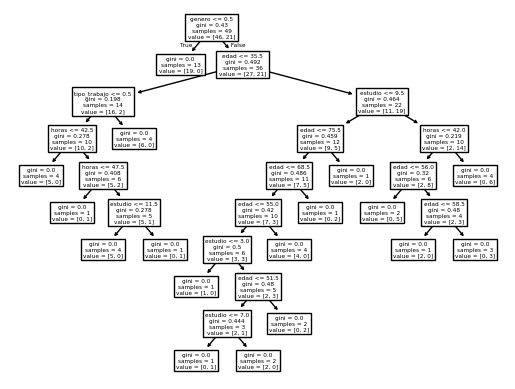

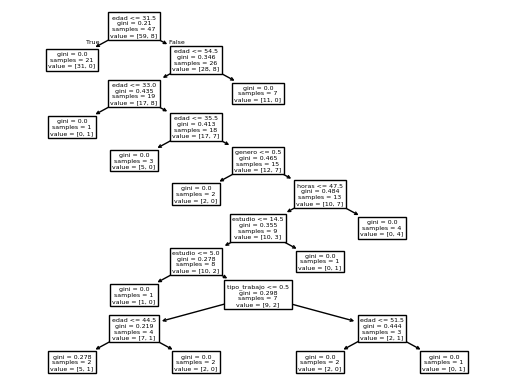

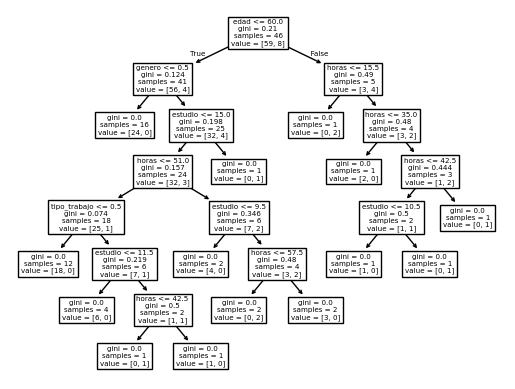

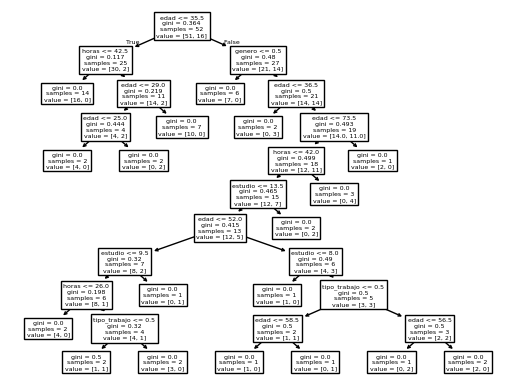

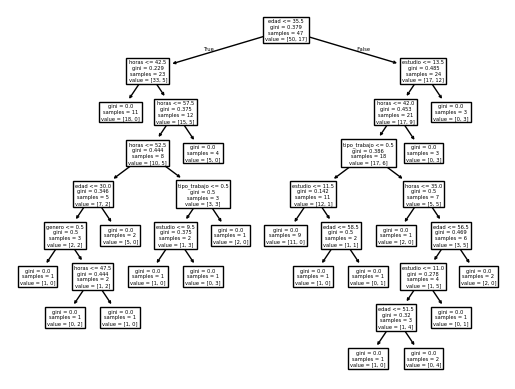

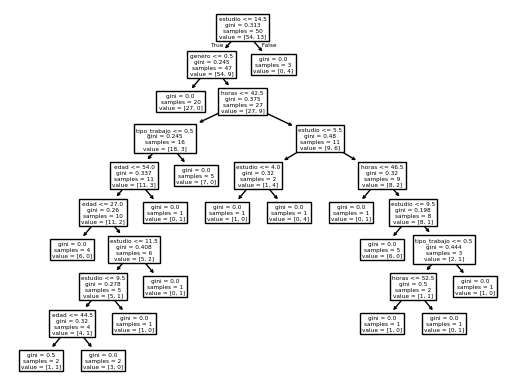

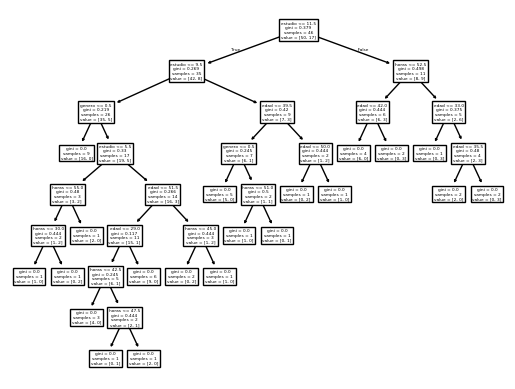

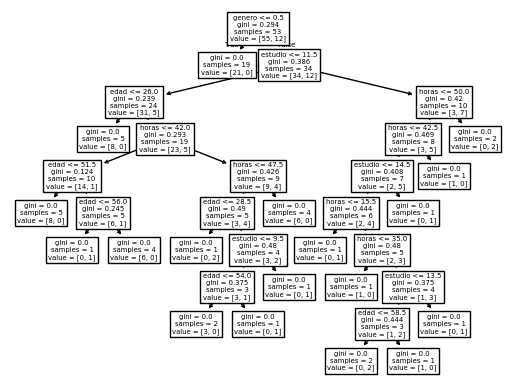

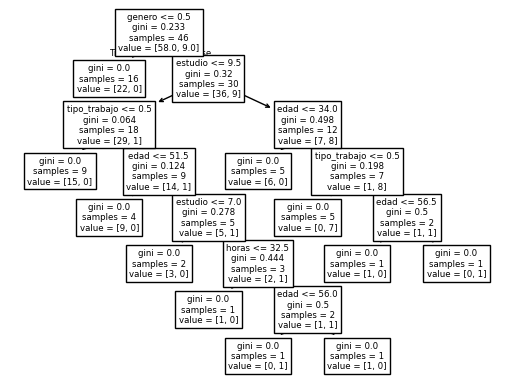

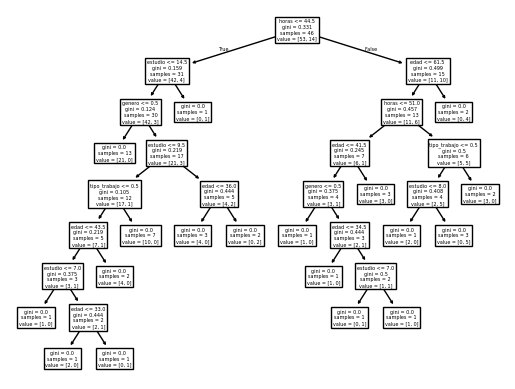

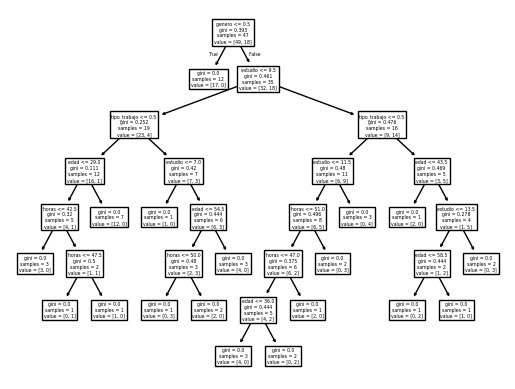

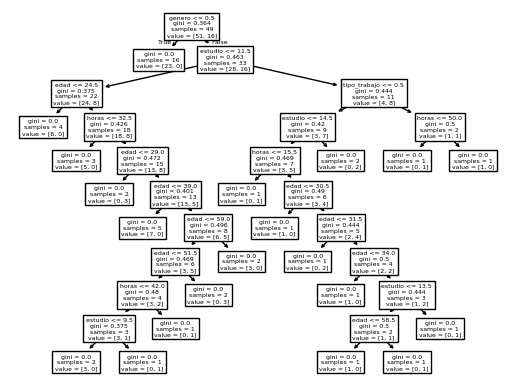

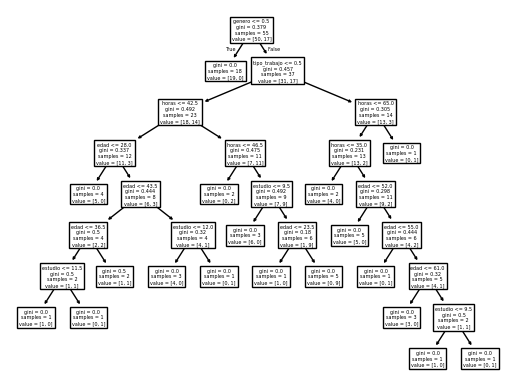

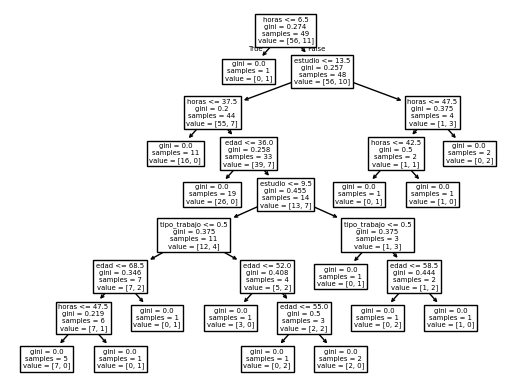

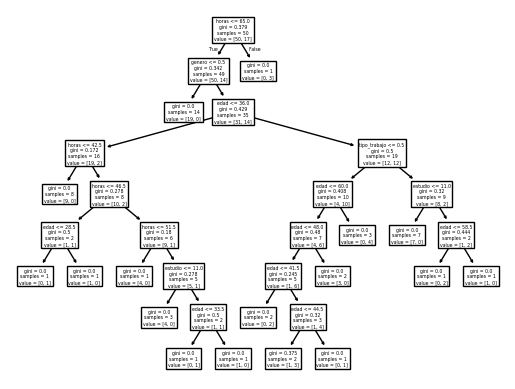

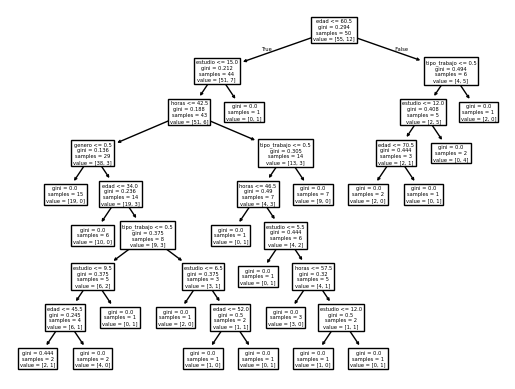

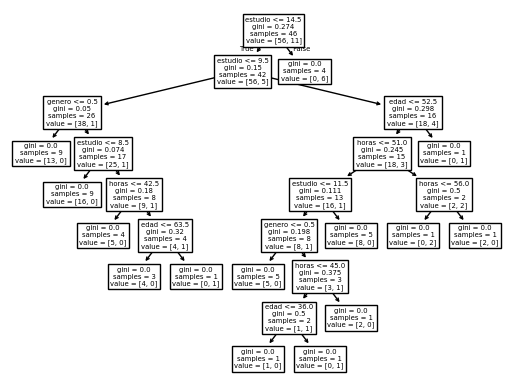

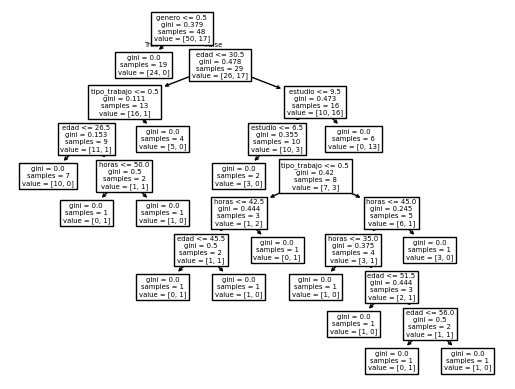

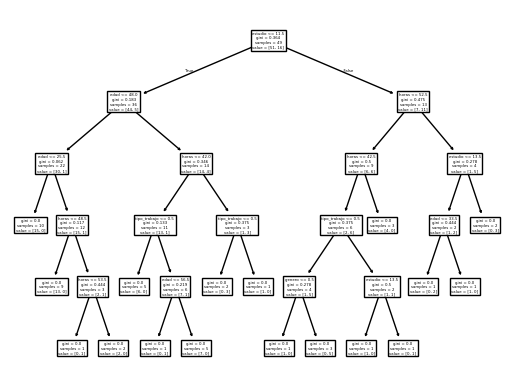

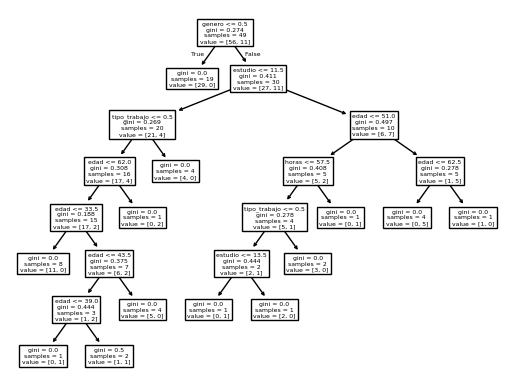

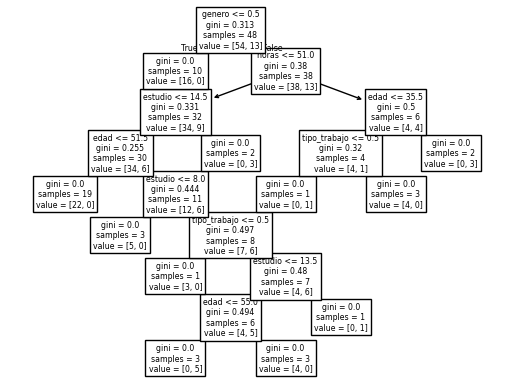

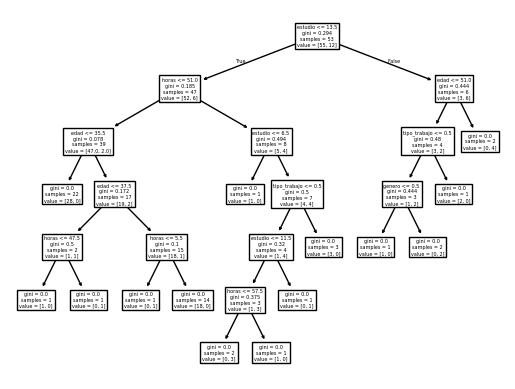

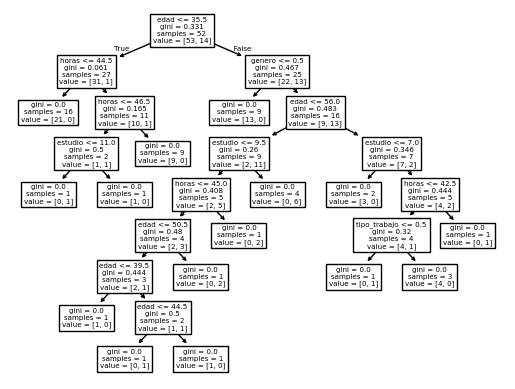

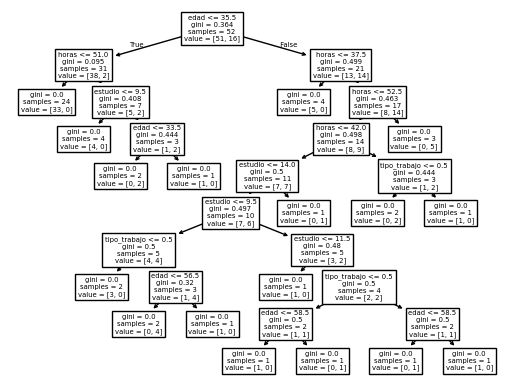

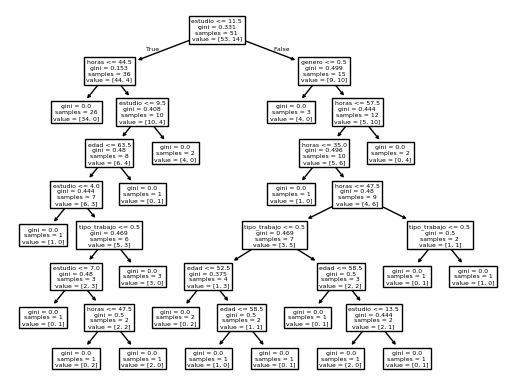

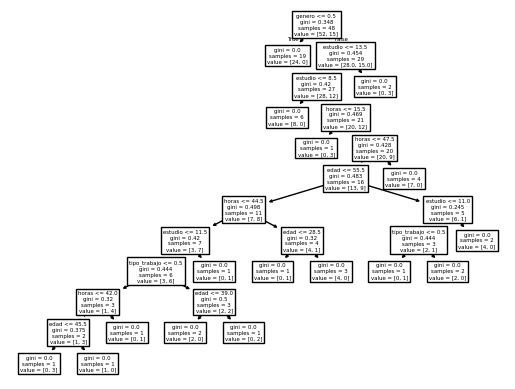

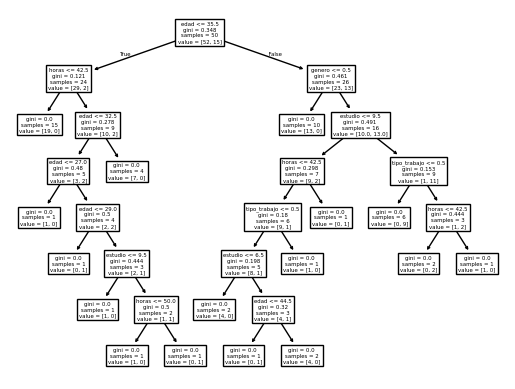

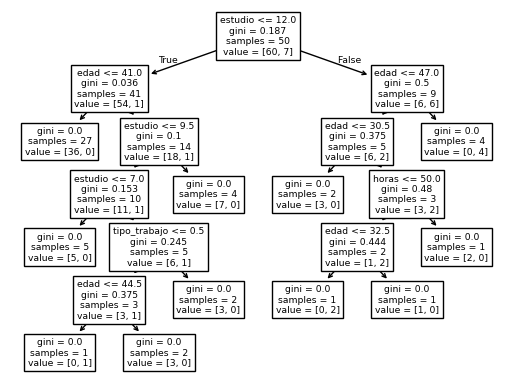

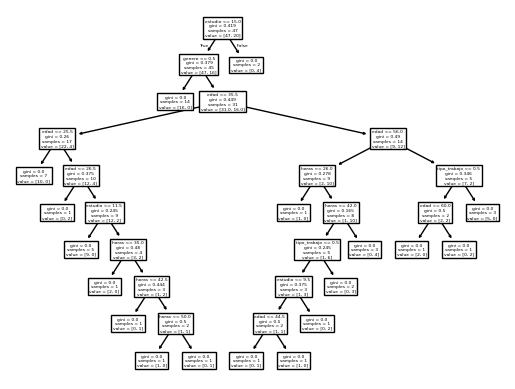

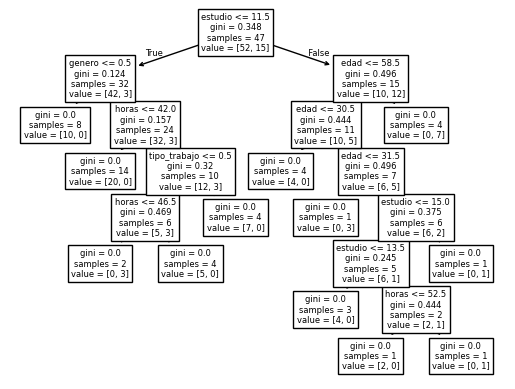

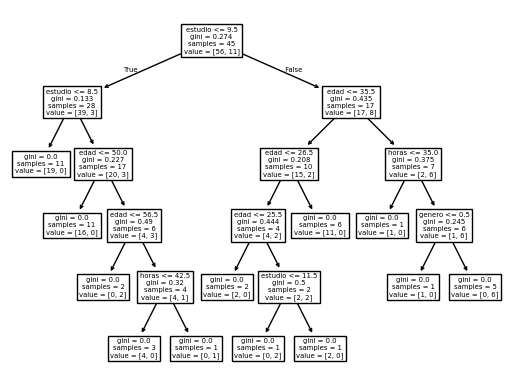

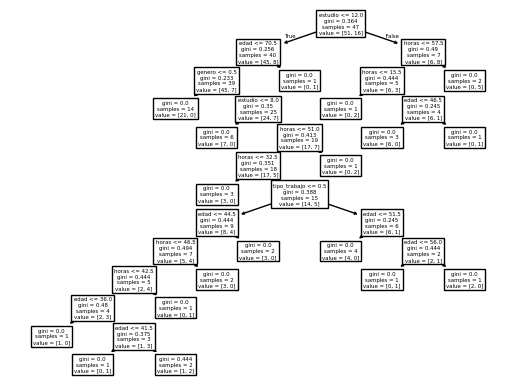

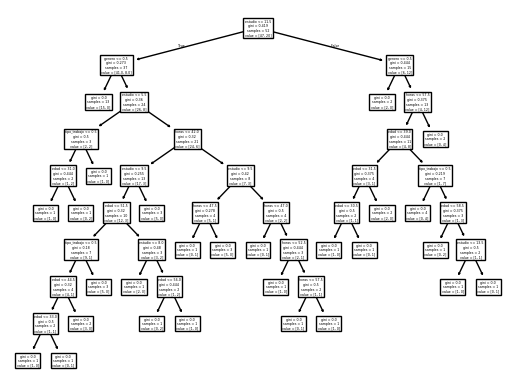

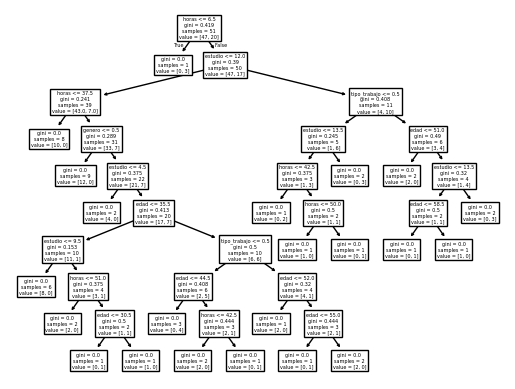

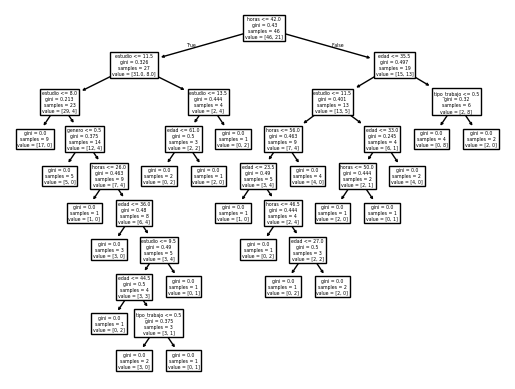

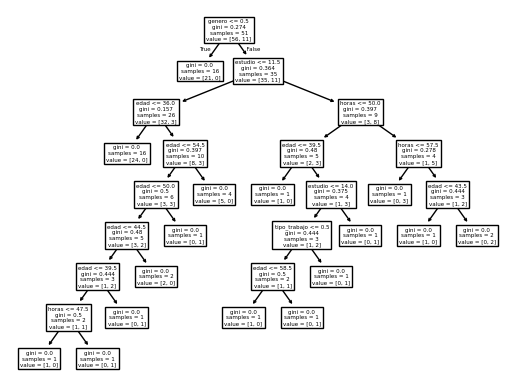

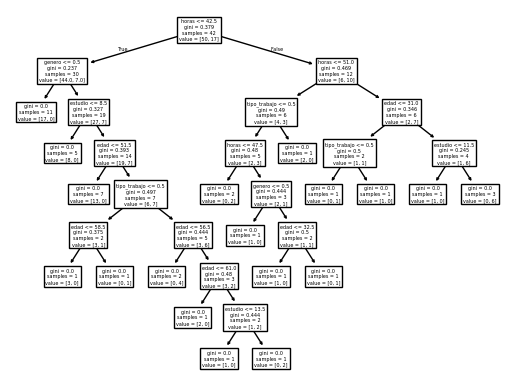

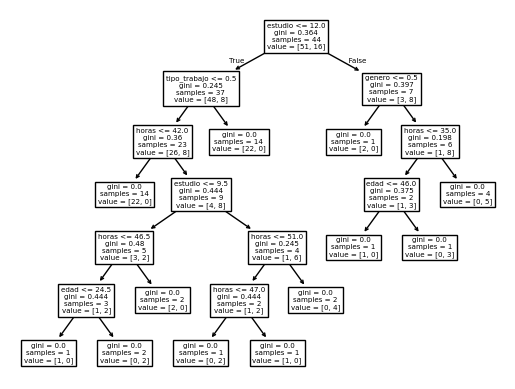

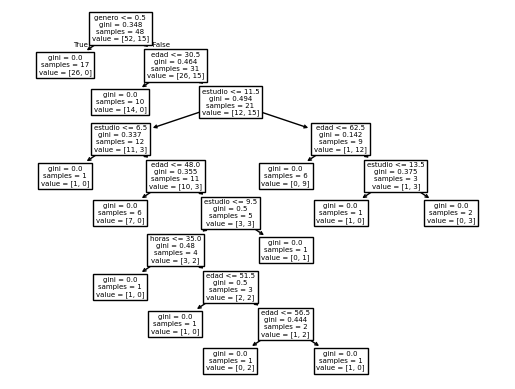

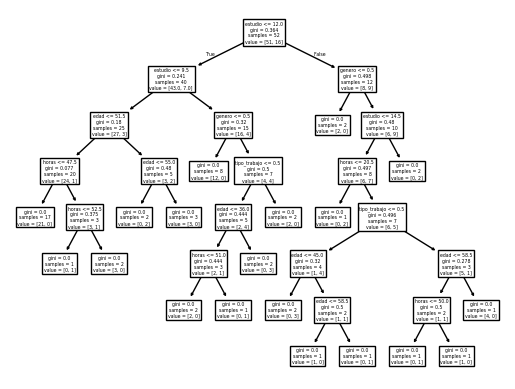

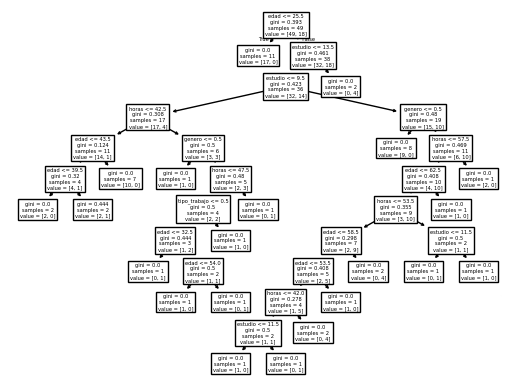

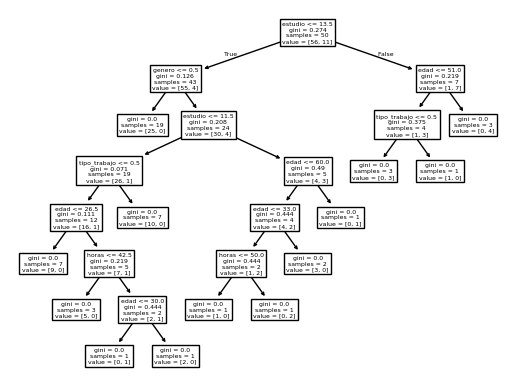

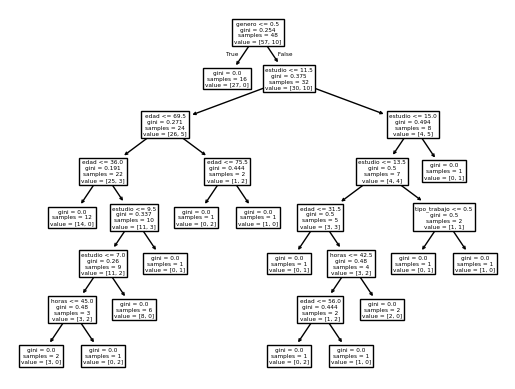

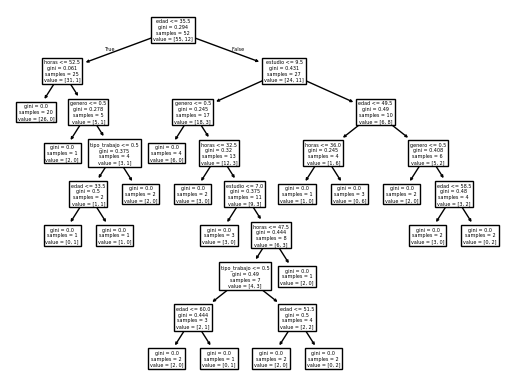

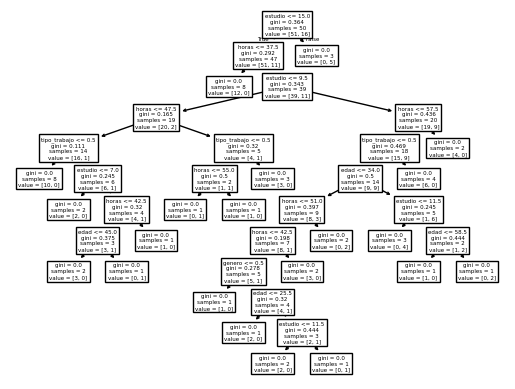

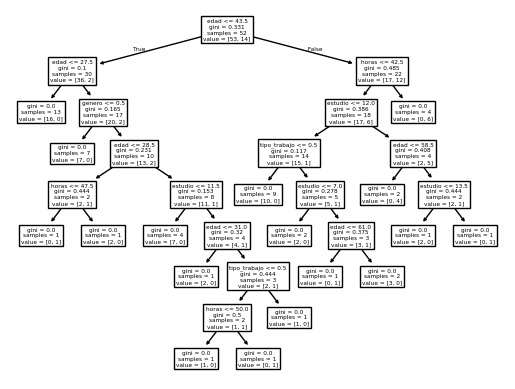

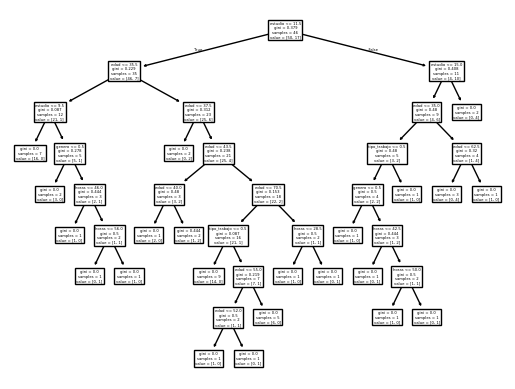

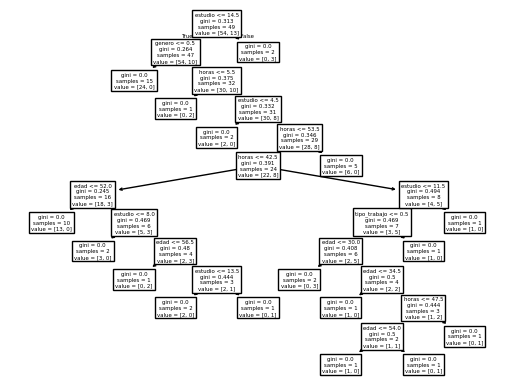

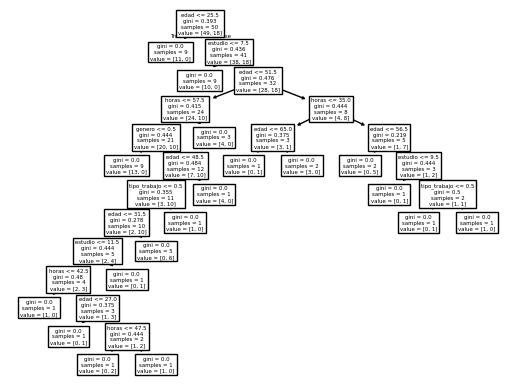

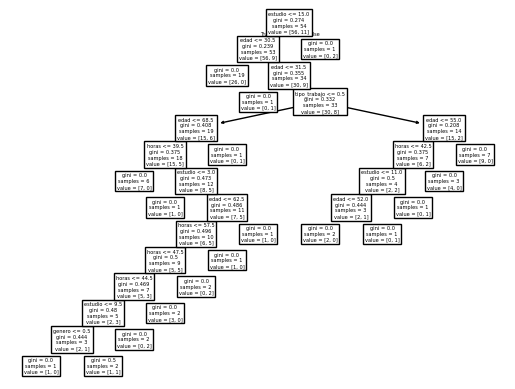

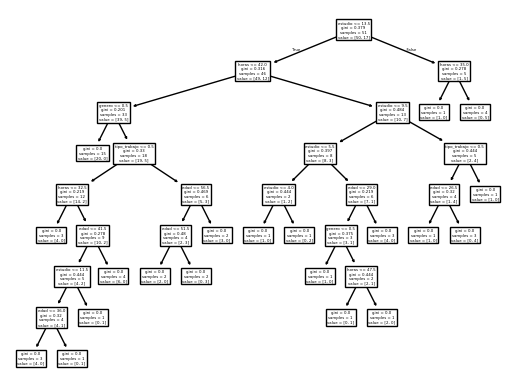

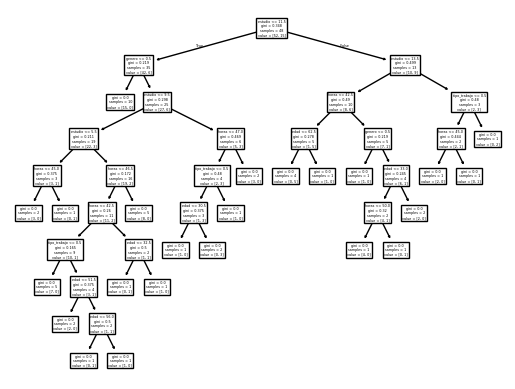

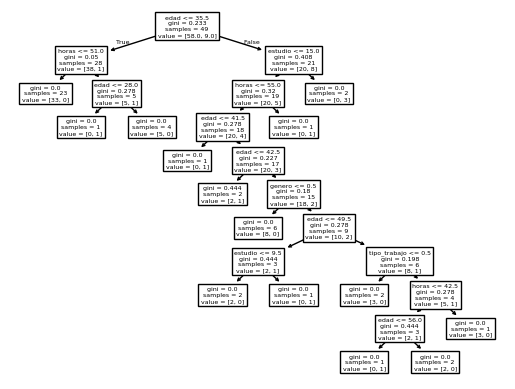

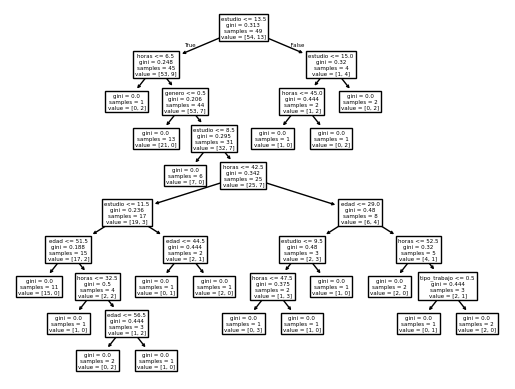

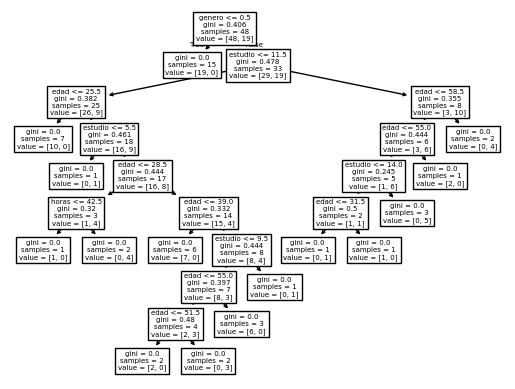

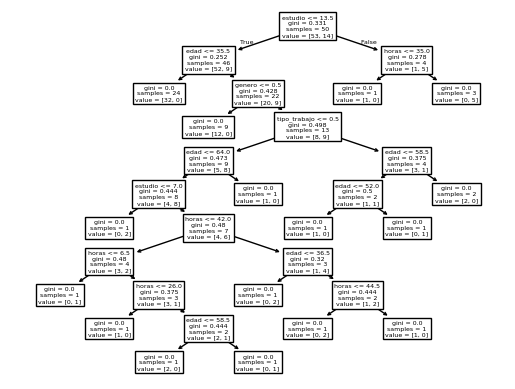

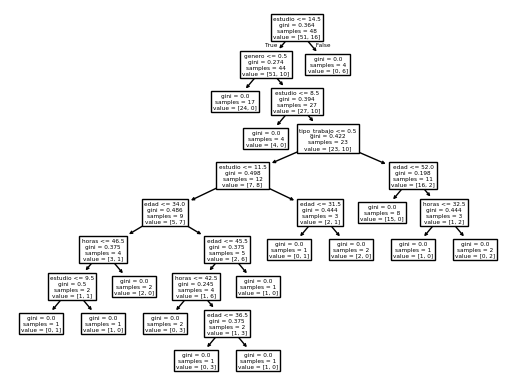

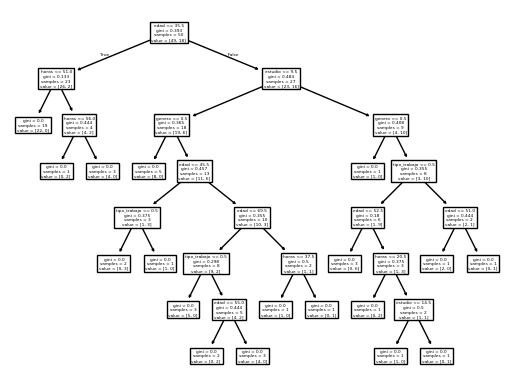

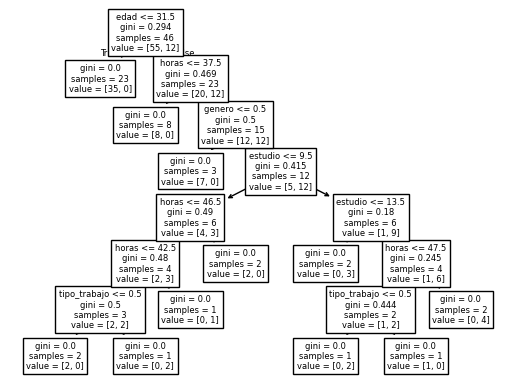

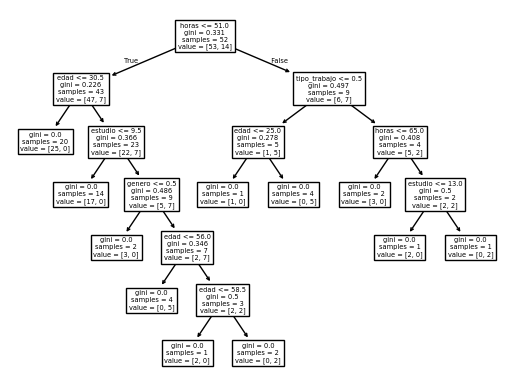

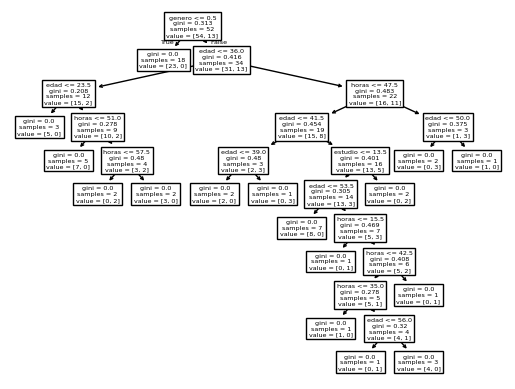

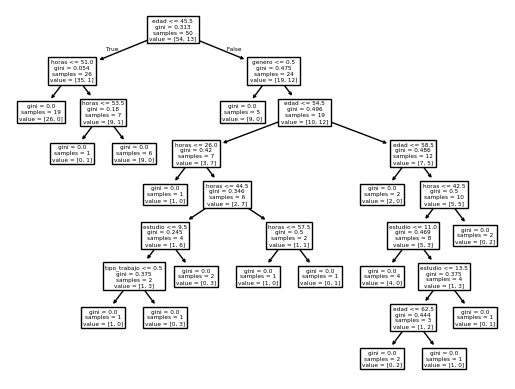

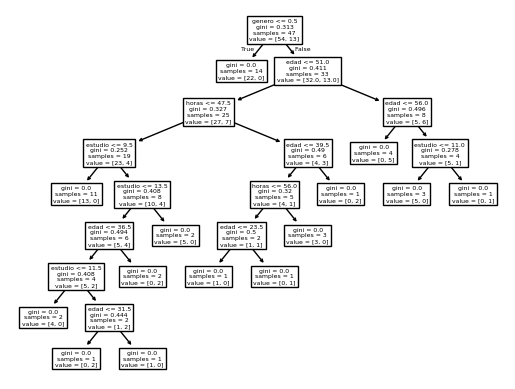

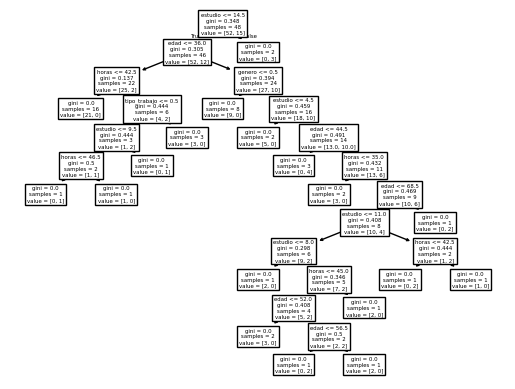

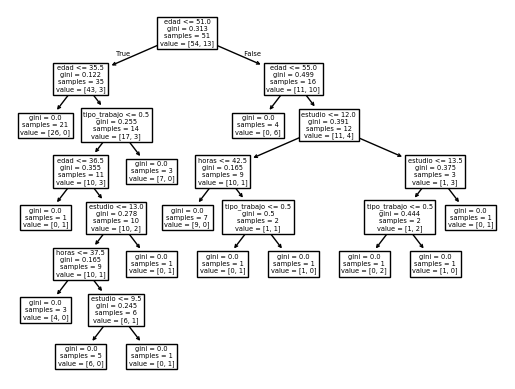

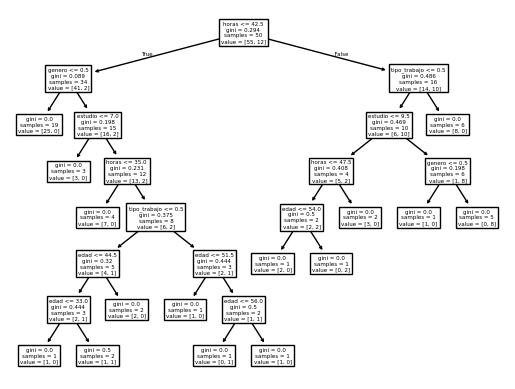

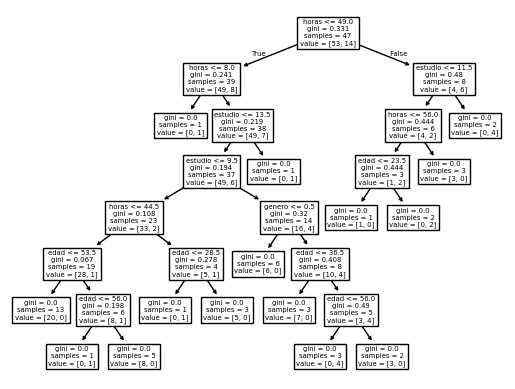

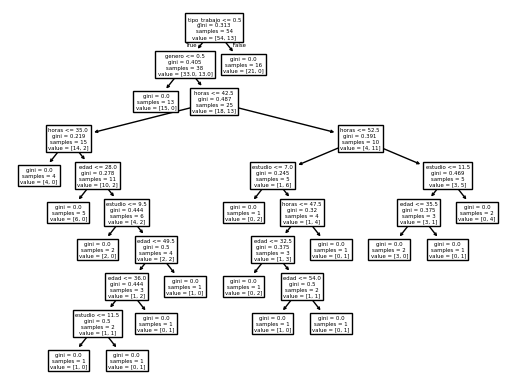

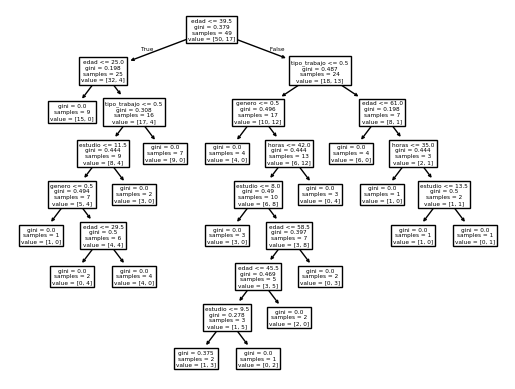

KeyboardInterrupt: 

In [29]:
for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names=personas.columns[:-1])
    plt.show()